# Projeto pinguins

### Bibliotecas

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import graphviz 
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Abrindo o arquivo

In [2]:
# Abrindo o arquivo csv
df = pd.read_csv('penguins.csv')
display(df)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Análise inicial

In [3]:
# Removendo a primeira coluna
df = df.iloc[:,1:]
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:
# Selecionando linhas com dados faltantes
valores_na = df['sex'].isna()
df_nulos = df[valores_na]
display(df_nulos)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


Podemos observar que apenas 2 pinguins possuem dados faltantes nas colunas bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g e sex (ids 3 e 271). \
Os outros possuem dados faltantes apenas na coluna sex (ids 8, 9, 10, 11, 47, 178, 218, 256 e 268).

### Tratamento de valores nulos

Para tratar os valores faltantes numéricos (bill_length_mm, bill_depth_mm, flipper_length_mm e body_mass_g) decidiu-se preenchê-los com os valores médios dos pinguins da mesma ilha. Como eram apenas 2 pinguins, não foi feita a diferenciação entre machos e fêmeas - até porque não sabemos os sexos desses dois pinguins.

In [6]:
# Substituindo os valores nulos pelos valores médios dos pinguins daquela ilha
df = df.fillna(df.loc[df['island']=='Torgersen',:].mean()).round(2)
df = df.fillna(df.loc[df['island']=='Biscoe',:].mean()).round(2)
display(df)

C:\Users\User\AppData\Local\Temp\ipykernel_11244\2682249368.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.loc[df['island']=='Torgersen',:].mean()).round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_11244\2682249368.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.loc[df['island']=='Biscoe',:].mean()).round(2)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.0,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.0,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.0,3250.00,female,2007
3,Adelie,Torgersen,38.95,18.43,191.2,3706.37,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.0,3450.00,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80,19.80,207.0,4000.00,male,2009
340,Chinstrap,Dream,43.50,18.10,202.0,3400.00,female,2009
341,Chinstrap,Dream,49.60,18.20,193.0,3775.00,male,2009
342,Chinstrap,Dream,50.80,19.00,210.0,4100.00,male,2009


Para a variável categórica sex, optou-se por aplicar um modelo de árvore de decisão para prever o sexo dos pinguins a partir das outras variáveis.

In [7]:
# Selecionando o dataframe sem valores nulos
df_sem_nulos = df.dropna()
# Definindo o dataframe a ser utilizado na árvore de decisão
df_classificador = df_sem_nulos.iloc[:,:-2]
# Substituindo as variáveis categóricas por variáveis numéricas correspondentes
df_classificador = df_classificador.replace('Adelie',1).replace('Gentoo',2).replace('Chinstrap',3)
df_classificador = df_classificador.replace('Torgersen',1).replace('Biscoe',2).replace('Dream',3)
display(df_classificador)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.1,18.7,181.0,3750.0
1,1,1,39.5,17.4,186.0,3800.0
2,1,1,40.3,18.0,195.0,3250.0
4,1,1,36.7,19.3,193.0,3450.0
5,1,1,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
339,3,3,55.8,19.8,207.0,4000.0
340,3,3,43.5,18.1,202.0,3400.0
341,3,3,49.6,18.2,193.0,3775.0
342,3,3,50.8,19.0,210.0,4100.0


In [8]:
# Dividindo o dataframe em treino e teste
x_train, x_test, y_train, y_test = train_test_split(df_classificador, df_sem_nulos['sex'], test_size = 0.2)

In [9]:
# Criando o modelo
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = clf.score(x_test, y_test)
# Printando a acurácia do modelo
print("Acurácia: ", acc.round(2))

Acurácia:  0.85


In [10]:
# Selecionando o dataframe com os valores nulos a serem previstos
valores_na = df['sex'].isna()
df_nulos = df[valores_na]
# Substituindo as variáveis categóricas por variáveis numéricas correspondentes
df_classificador_nulos = df_nulos.replace('Adelie',1).replace('Gentoo',2).replace('Chinstrap',3)
df_classificador_nulos = df_classificador_nulos.replace('Torgersen',1).replace('Biscoe',2).replace('Dream',3)
display(df_classificador_nulos)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,1,1,38.95,18.43,191.2,3706.37,NaN,2007
8,1,1,34.10,18.10,193.0,3475.00,NaN,2007
9,1,1,42.00,20.20,190.0,4250.00,NaN,2007
10,1,1,37.80,17.10,186.0,3300.00,NaN,2007
11,1,1,37.80,17.30,180.0,3700.00,NaN,2007
47,1,3,37.50,18.90,179.0,2975.00,NaN,2007
178,2,2,44.50,14.30,216.0,4100.00,NaN,2007
218,2,2,46.20,14.40,214.0,4650.00,NaN,2008
256,2,2,47.30,13.80,216.0,4725.00,NaN,2009
268,2,2,44.50,15.70,217.0,4875.00,NaN,2009


In [11]:
# Prevendo a variável sex de acordo com o modelo
sex_predict = list(clf.predict(df_classificador_nulos.iloc[:,:-2]))
sex_predict

['female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female']

In [12]:
# Substituindo os valores no dataframe original
contador = 0
for i, valor in enumerate(df['sex']):
    if pd.isna(valor):
        df.loc[i, 'sex'] = sex_predict[contador]
        contador += 1
display(df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.0,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.0,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.0,3250.00,female,2007
3,Adelie,Torgersen,38.95,18.43,191.2,3706.37,female,2007
4,Adelie,Torgersen,36.70,19.30,193.0,3450.00,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80,19.80,207.0,4000.00,male,2009
340,Chinstrap,Dream,43.50,18.10,202.0,3400.00,female,2009
341,Chinstrap,Dream,49.60,18.20,193.0,3775.00,male,2009
342,Chinstrap,Dream,50.80,19.00,210.0,4100.00,male,2009


In [13]:
# Confirmando se não há mais valores nulos
np.sum(df.isnull())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

### Análise exploratória

In [17]:
# Tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [21]:
# Medidas descritivas das variáveis numéricas
df.iloc[:,:-1].describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,344.0,43.893023,5.456790,32.1,39.2,44.25,48.5,59.6
bill_depth_mm,344.0,17.158605,1.971433,13.1,15.6,17.30,18.7,21.5
flipper_length_mm,344.0,200.858721,14.040156,172.0,190.0,197.00,213.0,231.0
body_mass_g,344.0,4198.874244,800.502130,2700.0,3550.0,4025.00,4750.0,6300.0


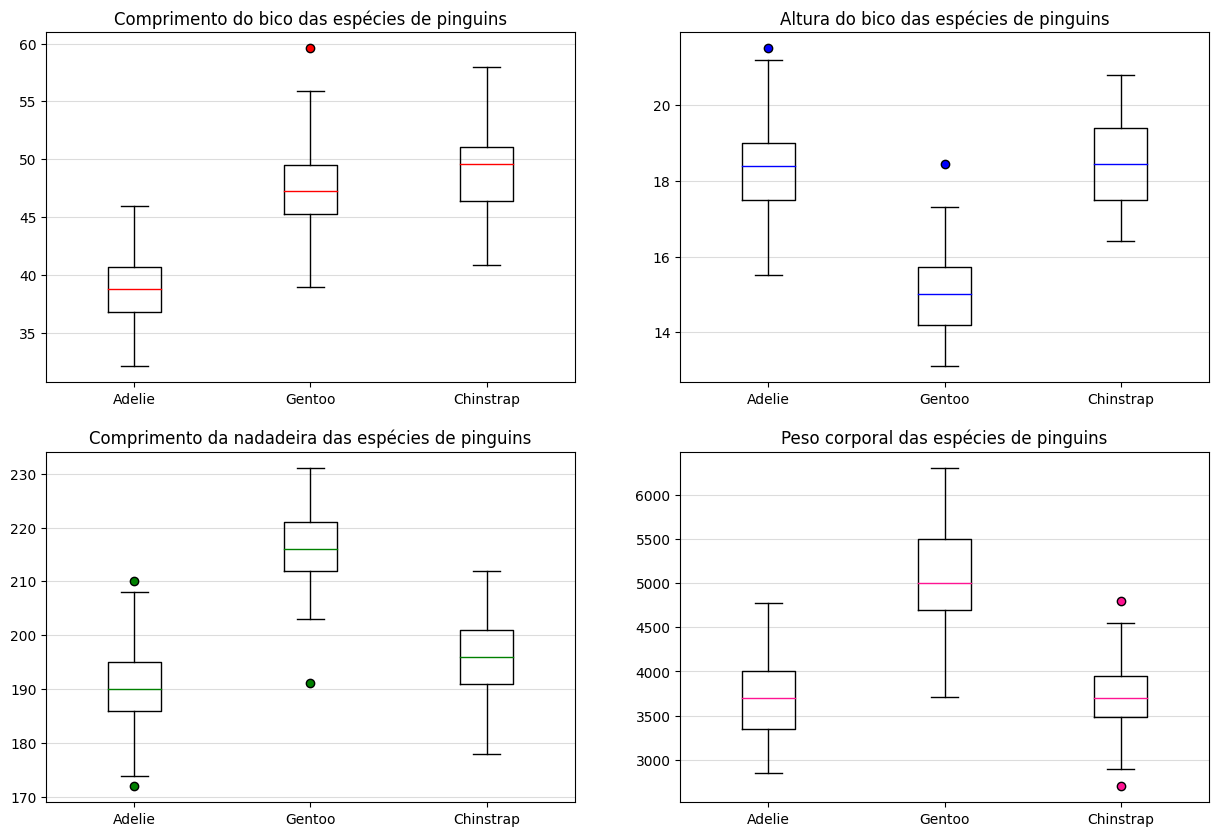

In [60]:
# Boxplot de bill_length_mm
bill_lenght = [df.loc[df['species']=='Adelie','bill_length_mm'], df.loc[df['species']=='Gentoo','bill_length_mm'], df.loc[df['species']=='Chinstrap','bill_length_mm']]
figs, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0,0].set_title('Comprimento do bico das espécies de pinguins')
axs[0,0].boxplot(bill_lenght, medianprops=dict(color='red'), flierprops=dict(markerfacecolor = 'red'))
axs[0,0].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[0,0].yaxis.grid(True, color='gainsboro')
# Boxplot de bill_depth_mm
bill_depth_mm = [df.loc[df['species']=='Adelie','bill_depth_mm'], df.loc[df['species']=='Gentoo','bill_depth_mm'], df.loc[df['species']=='Chinstrap','bill_depth_mm']]
axs[0,1].set_title('Altura do bico das espécies de pinguins')
axs[0,1].boxplot(bill_depth_mm, medianprops=dict(color='blue'), flierprops=dict(markerfacecolor = 'blue'))
axs[0,1].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[0,1].yaxis.grid(True, color='gainsboro')
# Boxplot de flipper_length_mm
flipper_length_mm = [df.loc[df['species']=='Adelie','flipper_length_mm'], df.loc[df['species']=='Gentoo','flipper_length_mm'], df.loc[df['species']=='Chinstrap','flipper_length_mm']]
axs[1,0].set_title('Comprimento da nadadeira das espécies de pinguins')
axs[1,0].boxplot(flipper_length_mm, medianprops=dict(color='green'), flierprops=dict(markerfacecolor = 'green'))
axs[1,0].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[1,0].yaxis.grid(True, color='gainsboro')
# Boxplot de body_mass_g
body_mass_g = [df.loc[df['species']=='Adelie','body_mass_g'], df.loc[df['species']=='Gentoo','body_mass_g'], df.loc[df['species']=='Chinstrap','body_mass_g']]
axs[1,1].set_title('Peso corporal das espécies de pinguins')
axs[1,1].boxplot(body_mass_g, medianprops=dict(color='deeppink'), flierprops=dict(markerfacecolor = 'deeppink'))
axs[1,1].set_xticks([1,2,3], labels=['Adelie', 'Gentoo', 'Chinstrap'])
axs[1,1].yaxis.grid(True, color='gainsboro')
plt.show()

Considerações